In [1]:
%load_ext autoreload
%autoreload 2

from mcmc_informations import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Basic 10 nodes susceptibility and TE

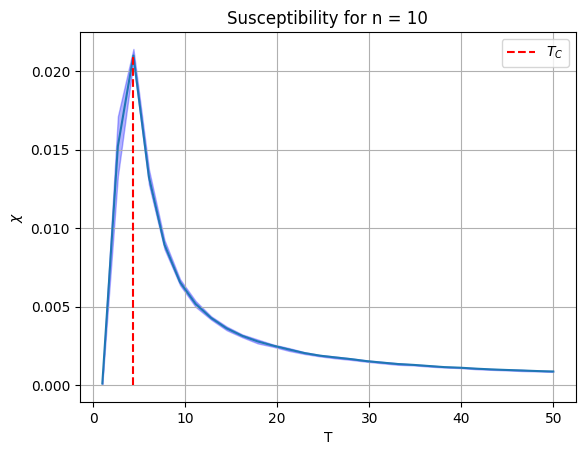

In [2]:
n = 10
temperatures = np.linspace(1, 50, 30)
J = conn_matrix_basic(n)
sim_data = run_simulation(15, 10000, temperatures, n, J)
idx = np.argmax(sim_data[2])
tc = temperatures[idx]

plt.plot(temperatures, sim_data[2])
lower_bound = np.subtract(sim_data[2], sim_data[3])
upper_bound = np.add(sim_data[2], sim_data[3])
plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3, color = 'b')
plt.ylabel(r'$\chi$')
plt.xlabel('T')
plt.title('Susceptibility for n = 10')
plt.grid()
plt.vlines(tc, 0, np.max(sim_data[2]), linestyles='dashed', colors='r', label = r'$T_C$')
plt.legend()
plt.savefig('Results/Sus_basic.png', bbox_inches = 'tight')

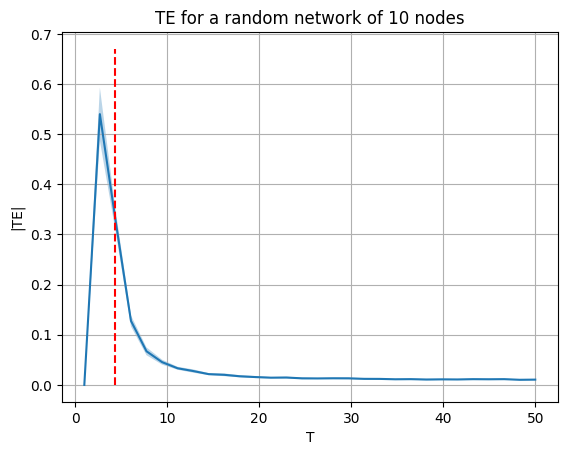

In [10]:
temperatures = np.linspace(1, 50, 30)
runs = 15
n_iterations = 10000
C = []
C_std = []
multi_sus = []


for T in temperatures:
    x = np.zeros(runs)
    sus = np.zeros(runs)
    for i in range(0, runs):
        spins = random_spins(n)        
        _, list_avg_magnetisation, sus[i], spins_timeseries = metropolis(spins, n_iterations, T, J, 1000) 
        x[i] = TE(spins_timeseries, J)
    C_std.append(np.std(x))
    C.append(np.abs(np.mean(x)))
    multi_sus.append(np.mean(sus))

tc = temperatures[np.argmax(multi_sus)]
lower_bound = np.subtract(C, C_std)
upper_bound = np.add(C, C_std)
plt.plot(temperatures, C)
plt.fill_between(temperatures, lower_bound, upper_bound, alpha=0.3)

plt.ylabel('|TE|')
plt.xlabel('T')
plt.grid()
plt.title('TE for a random network of 10 nodes')
plt.vlines(tc, 0, 0.67, linestyles='dashed', colors='r')
plt.savefig('Results/10_nodes_TE.png', bbox_inches='tight')